In [112]:
import pandas as pd
import os
all_data = pd.read_csv('/Users/Mukuna/Desktop/Cdata.csv')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,19/04/2019 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,07/04/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,30/04/2019 09:27,"333 8th St, Los Angeles, CA 90001",4


Question 1: What was the best month for sales? How much was earned in that month?

Adding a Sales Column

In [113]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,19/04/2019 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,07/04/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,30/04/2019 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Groupby Months

In [114]:
results = all_data.groupby('Month').sum()['Sales']
results



Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

December was the best month, with Sales: $4,613,443.34

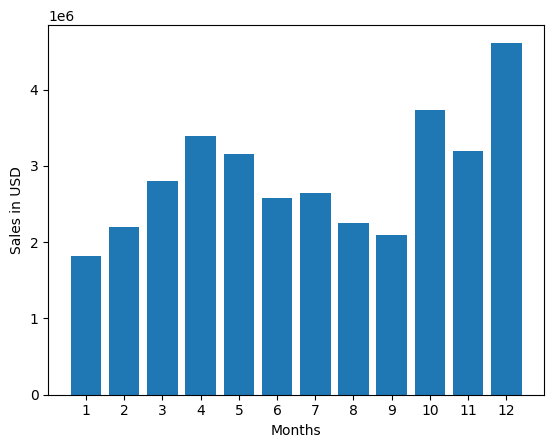

In [115]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results)
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Months')
plt.show()

Question 2: What city had the highest number of Sales?

In [116]:

#First create city column.
# It is important to include the state as some cities have similar names.

address_split = all_data['Purchase Address'].str.split(',')

all_data['City'] = address_split.str[1].str.strip()
all_data['State'] = address_split.str[2].str.strip().str.split(' ').str[0]

all_data['City'] = all_data['City'] + ' (' + all_data['State'] + ')'


all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,19/04/2019 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX
1,176559,Bose SoundSport Headphones,1,99.99,07/04/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA
2,176560,Google Phone,1,600.00,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA
3,176560,Wired Headphones,1,11.99,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA
4,176561,Wired Headphones,1,11.99,30/04/2019 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA
...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,17/09/2019 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),CA
185946,259354,iPhone,1,700.00,01/09/2019 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),CA
185947,259355,iPhone,1,700.00,23/09/2019 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),CA
185948,259356,34in Ultrawide Monitor,1,379.99,19/09/2019 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),CA


In [117]:
City_Sales = all_data.groupby('City').sum()['Sales']
City_Sales

City
Atlanta (GA)          2795498.58
Austin (TX)           1819581.75
Boston (MA)           3661642.01
Dallas (TX)           2767975.40
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Portland (ME)          449758.27
Portland (OR)         1870732.34
San Francisco (CA)    8262203.91
Seattle (WA)          2747755.48
Name: Sales, dtype: float64

San Francisco is the City with the most sales: $8,262,203.91

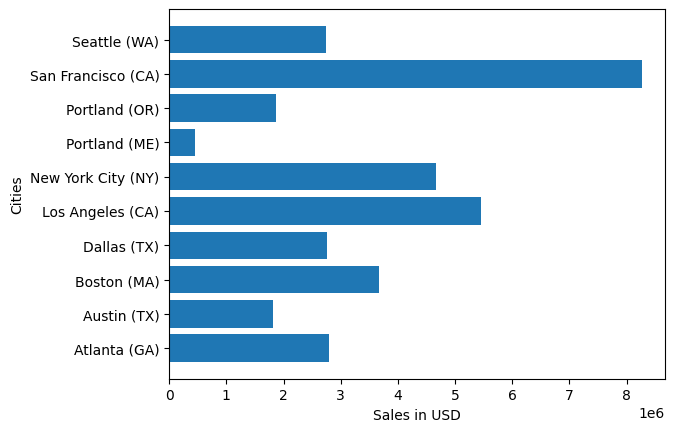

In [118]:
import matplotlib.pyplot as plt
Cities = [city for city, df in all_data.groupby('City')] 

#above code maintains same order as it occurs in df where each sales are representative.

plt.barh(Cities, City_Sales)
plt.ylabel('Cities')
plt.xlabel('Sales in USD')
plt.show()

Question 3: What time should we display advertisements to maximize likelihood of customers buying a product?

In [119]:
time_split = all_data['Order Date'].str.split(' ')

all_data['Time'] = time_split.str[1].str.strip()

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Time
0,176558,USB-C Charging Cable,2,11.95,19/04/2019 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX,08:46
1,176559,Bose SoundSport Headphones,1,99.99,07/04/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA,22:30
2,176560,Google Phone,1,600.00,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,14:38
3,176560,Wired Headphones,1,11.99,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,14:38
4,176561,Wired Headphones,1,11.99,30/04/2019 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,09:27


In [120]:
all_data['Hour'] = all_data['Time'].str[0:2].astype(int)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Time,Hour
0,176558,USB-C Charging Cable,2,11.95,19/04/2019 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),TX,08:46,8
1,176559,Bose SoundSport Headphones,1,99.99,07/04/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),MA,22:30,22
2,176560,Google Phone,1,600.00,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),CA,14:38,14
3,176560,Wired Headphones,1,11.99,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,14:38,14
4,176561,Wired Headphones,1,11.99,30/04/2019 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),CA,09:27,9


This code can be replaced with the following code which is much simpler and less complicated:
all_data['Order Date'] = all_data['Hour'].dt.Hour

In [121]:
Sales_per_Hr = all_data.groupby('Hour').sum()['Sales']
Sales_per_Hr


Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

Before 1100hrs(11am) and 1900hrs(7pm) are the best times to advertise as they have the most sales.

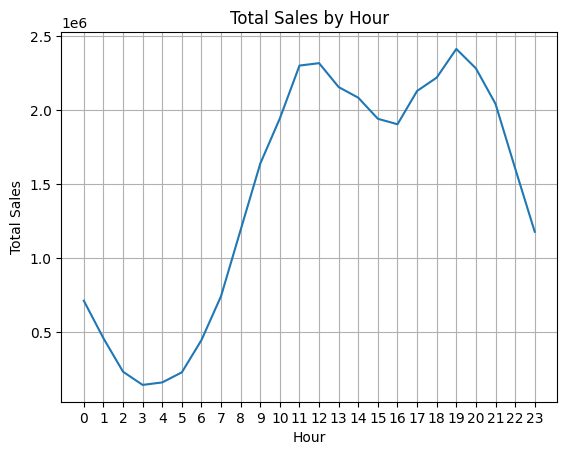

In [122]:
Hours = [Hour for Hour, df in all_data.groupby('Hour')] 
plt.plot(Hours, Sales_per_Hr)
plt.grid()
plt.xlabel('Hour')
plt.xticks(Hours)
plt.ylabel('Total Sales')
plt.title('Total Sales by Hour')
plt.show()

Question 4: What Products are most often sold together?

In [123]:
# Needed to create a new Data Frame (df)
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df = df[['Order ID', 'grouped']].drop_duplicates()
df.head()

C:\Users\Mukuna\AppData\Local\Temp\ipykernel_17496\1316146673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [124]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Question 5: What product sold the most? Why do you think it sold the most?

In [125]:
most_sold = all_data.groupby('Product').sum()['Quantity Ordered']
most_sold

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

The most sold products are: AA Batteries(4-pack) at 27,635 units and AAA Batteries(4-pack) at 31,017 units.

These are the most sold products because they are cheaper than the other products.

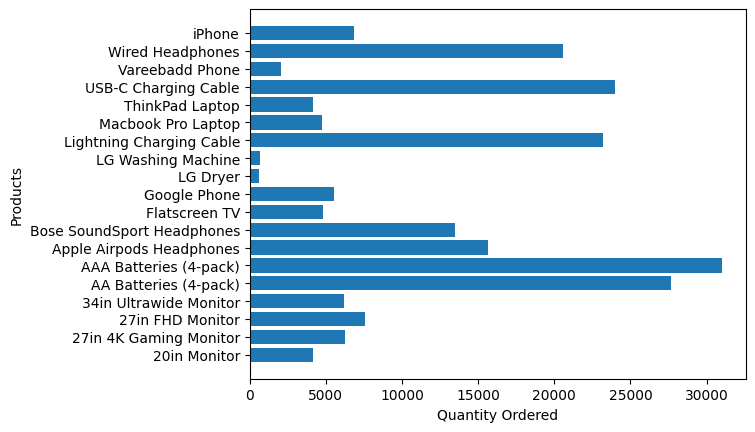

In [126]:
products = [product for product, df in all_data.groupby('Product')] 

#above code maintains same order as it occurs in df where each sales are representative.

plt.barh(products, most_sold)
plt.ylabel('Products')
plt.xlabel('Quantity Ordered')
plt.show()

In [127]:
prices = all_data.groupby('Product').mean(numeric_only=True)['Price Each']


C:\Users\Mukuna\AppData\Local\Temp\ipykernel_17496\3541506542.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation= 'vertical', size=8)


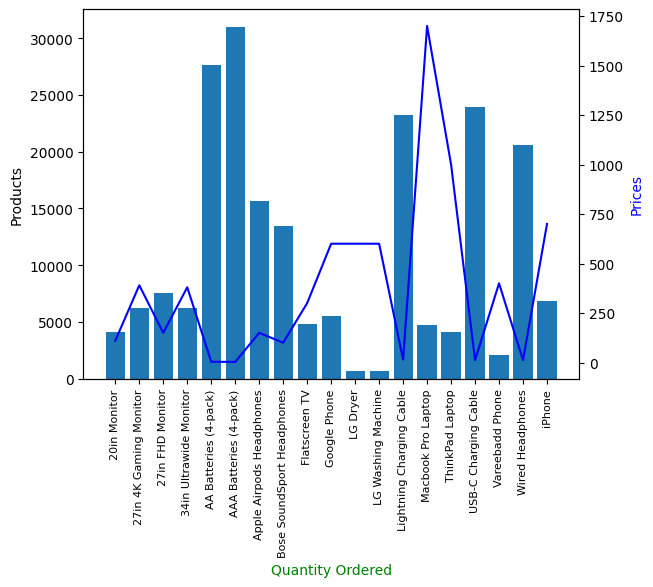

In [128]:

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,most_sold)
ax2.plot(products,prices, 'b-')

ax1.set_ylabel('Products')
ax1.set_xlabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Prices', color = 'b')
ax1.set_xticklabels(products, rotation= 'vertical', size=8)

plt.show()